# TESSplot
## A tool for plotting and interpreting TESS lightcurve data from the SPOC pipeline

In [32]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (10,7)
%matplotlib notebook

import astroquery
from astroquery.mast import Observations

import pandas as pd
pd.set_option('display.max_colwidth', None)

import astropy
from astropy.io import fits
from astropy.timeseries import LombScargle

from glob import glob
import os
import sys

# Downloading TESS data

In [2]:
tic_id = 6893917

### Existing folder check

In [3]:
cwd = os.getcwd()

if os.path.isdir('TIC-{}'.format(tic_id)):
    print("Folder already exists.")
else:
    print("Creating folder.")
    os.mkdir('TIC-{}'.format(tic_id))

Folder alreay exists.


### Data download

In [4]:
obsTable = Observations.query_criteria(
    provenance_name='TESS-SPOC', 
    target_name=tic_id)

data = Observations.get_product_list(obsTable)

data2 = pd.DataFrame(np.array(data))
contain_values = data2[data2['dataURI'].str.contains('lc')]
display(contain_values[['project', 'productFilename', 'description', 'dataproduct_type']])

,project,productFilename,description,dataproduct_type
5,TESS-SPOC,hlsp_tess-spoc_tess_phot_0000000006893917-s0044_tess_v1_lc.fits,FITS,timeseries
12,TESS-SPOC,hlsp_tess-spoc_tess_phot_0000000006893917-s0045_tess_v1_lc.fits,FITS,timeseries
19,TESS-SPOC,hlsp_tess-spoc_tess_phot_0000000006893917-s0046_tess_v1_lc.fits,FITS,timeseries


#### Download the light curves (without displaying all the information).

In [5]:
%%capture
download_lc = Observations.download_products(data)

#### Find all the actual light curve files with the specified TIC ID in the filename and display them.

In [6]:
files = sorted(glob('mastDownload/HLSP/*{}*/*lc*'.format(tic_id)))
files = pd.DataFrame(np.array(files))
display(files)
files = sorted(glob('mastDownload/HLSP/*{}*/*lc*'.format(tic_id)))

,0
0,mastDownload/HLSP\hlsp_tess-spoc_tess_phot_0000000006893917-s0044_tess_v1_tp\hlsp_tess-spoc_tess_phot_0000000006893917-s0044_tess_v1_lc.fits
1,mastDownload/HLSP\hlsp_tess-spoc_tess_phot_0000000006893917-s0045_tess_v1_tp\hlsp_tess-spoc_tess_phot_0000000006893917-s0045_tess_v1_lc.fits
2,mastDownload/HLSP\hlsp_tess-spoc_tess_phot_0000000006893917-s0046_tess_v1_tp\hlsp_tess-spoc_tess_phot_0000000006893917-s0046_tess_v1_lc.fits


#### Arrays always start at eg. files[0] - go through and find the ones you want, and label them by sector number.

In [7]:
fits_file1 = files[0]
fits_file2 = files[1]
fits_file3 = files[2]


sector1 = '44'
sector2 = '45'
sector3 = '46'

# Reading in TESS data
#### TESS-SPOC data comes as a .fits file - you can check the headers in a code or use a program like fv to look at what options there are available. Here we're just pulling out the time, the raw SAP flux, the detrended and cleaned PDCSAP flux, the errors on the PDCSAP flux, and the background flux.

In [8]:
with fits.open(fits_file1, mode="readonly") as hdulist:
    time1 = hdulist[1].data['TIME']
    sap1 = hdulist[1].data['SAP_FLUX']
    flux1 = hdulist[1].data['PDCSAP_FLUX']
    flux_err1 = hdulist[1].data['PDCSAP_FLUX_ERR']
    bkg1 = hdulist[1].data['SAP_BKG']

In [9]:
with fits.open(fits_file2, mode="readonly") as hdulist:
    time2 = hdulist[1].data['TIME']
    sap2 = hdulist[1].data['SAP_FLUX']
    flux2 = hdulist[1].data['PDCSAP_FLUX']
    flux_err2 = hdulist[1].data['PDCSAP_FLUX_ERR']
    bkg2 = hdulist[1].data['SAP_BKG']

In [10]:
with fits.open(fits_file3, mode="readonly") as hdulist:
    time3 = hdulist[1].data['TIME']
    sap3 = hdulist[1].data['SAP_FLUX']
    flux3 = hdulist[1].data['PDCSAP_FLUX']
    flux_err3 = hdulist[1].data['PDCSAP_FLUX_ERR']
    bkg3 = hdulist[1].data['SAP_BKG']

# Normalising TESS data
#### We often want to normalise our data and remove any NaN values - the PDCSAP fluxes come in e-/s, but normalised is usually easier to read. We take the median of the datapoints (not the mean as this is affected by the transits) and divide by this value.

In [11]:
fluxnanremoved1 = flux1[np.logical_not(np.isnan(flux1))]
norm_factor1 = np.median(fluxnanremoved1)
norm_flux1 = flux1/norm_factor1

flux_errnanremoved1 = flux_err1[np.logical_not(np.isnan(flux_err1))]
norm_factor_err1 = 1
norm_flux_err1 = flux_err1/norm_factor_err1

In [12]:
fluxnanremoved2 = flux2[np.logical_not(np.isnan(flux2))]
norm_factor2 = np.median(fluxnanremoved2)
norm_flux2 = flux2/norm_factor2

flux_errnanremoved2 = flux_err2[np.logical_not(np.isnan(flux_err2))]
norm_factor_err2 = 1
norm_flux_err2 = flux_err2/norm_factor_err2

In [13]:
fluxnanremoved3 = flux3[np.logical_not(np.isnan(flux3))]
norm_factor3 = np.median(fluxnanremoved3)
norm_flux3 = flux3/norm_factor3

flux_errnanremoved3 = flux_err3[np.logical_not(np.isnan(flux_err3))]
norm_factor_err3 = 1
norm_flux_err3 = flux_err3/norm_factor_err3

In [ ]:
fluxnanremoved4 = flux4[np.logical_not(np.isnan(flux4))]
norm_factor4 = np.median(fluxnanremoved4)
norm_flux4 = flux4/norm_factor4

flux_errnanremoved4 = flux_err4[np.logical_not(np.isnan(flux_err4))]
norm_factor_err4 = 1
norm_flux_err4 = flux_err4/norm_factor_err4

In [ ]:
fluxnanremoved5 = flux5[np.logical_not(np.isnan(flux5))]
norm_factor5 = np.median(fluxnanremoved5)
norm_flux5 = flux5/norm_factor5

flux_errnanremoved5 = flux_err5[np.logical_not(np.isnan(flux_err5))]
norm_factor_err5 = 1
norm_flux_err5 = flux_err5/norm_factor_err5

In [ ]:
fluxnanremoved6 = flux6[np.logical_not(np.isnan(flux6))]
norm_factor6 = np.median(fluxnanremoved6)
norm_flux6 = flux6/norm_factor6

flux_errnanremoved6 = flux_err6[np.logical_not(np.isnan(flux_err6))]
norm_factor_err6 = 1
norm_flux_err6 = flux_err6/norm_factor_err6

# Plotting TESS data

In [14]:
facecolor='powderblue'
linecolor='steelblue'

In [15]:
times = [time1, time2, time3]

time = times[0]
for i in range(1, len(times)):
    time = np.concatenate((time, times[i]))

In [16]:
norm_fluxes = [norm_flux1, norm_flux2, norm_flux3]

norm_flux = norm_fluxes[0]
for i in range(1, len(norm_fluxes)):
    norm_flux = np.concatenate((norm_flux, norm_fluxes[i]))

In [17]:
norm_flux_errs = [norm_flux_err1, norm_flux_err2, norm_flux_err3]

norm_flux_err = norm_flux_errs[0]
for i in range(1, len(norm_flux_errs)):
    norm_flux_err = np.concatenate((norm_flux_err, norm_flux_errs[i]))

<IPython.core.display.Javascript object>


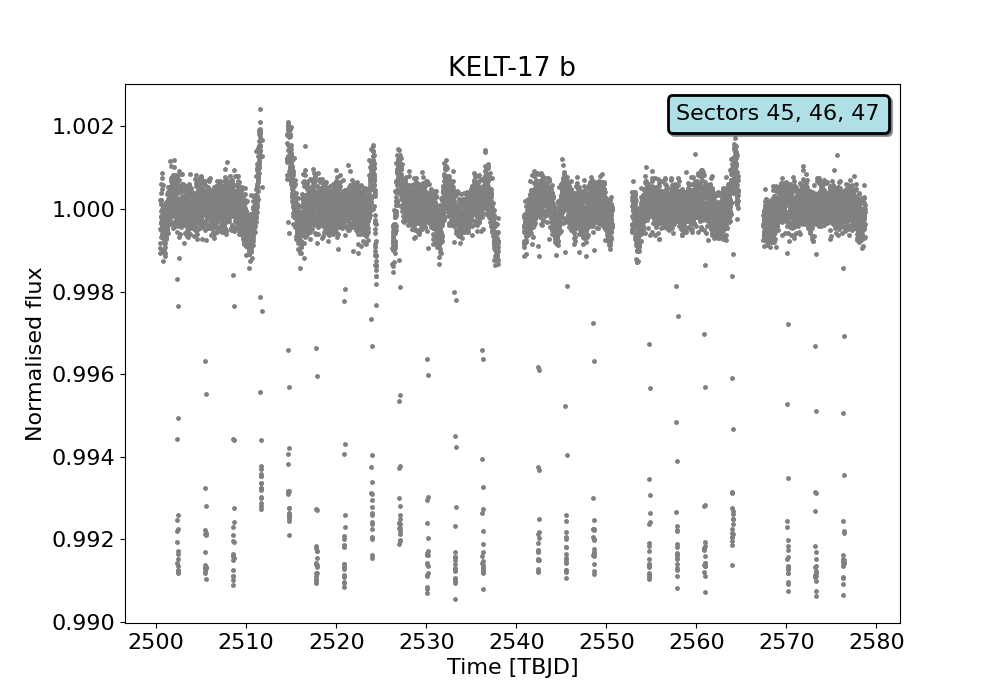

In [33]:
fig = plt.figure()

plt.plot(time, norm_flux, marker='.', color='grey', markersize=5.0, linestyle='None',
         label='Sectors 45, 46, 47')
plt.xlabel('Time [TBJD]')
plt.ylabel('Normalised flux')
plt.title('KELT-17 b')

leg = plt.legend(handlelength=0, 
                 handletextpad=0, 
                 fancybox=True,
                 shadow=True,
                 loc='upper right')
leg.get_frame().set_linewidth(2.0)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_facecolor(facecolor)
leg.legendHandles[0].set_markersize(0)

plt.savefig("TIC-{}/TIC-{}_all.pdf".format(tic_id,tic_id))
plt.savefig("TIC-{}/TIC-{}_all.png".format(tic_id,tic_id))

# Phase Folding

#### Set up the variables of planetary period and epoch (time of central transit) - you can check these on ExoFOP, or just try and eyeball it.

In [23]:
period1 = 3.0801716 
epoch1 = 2457226.14219 - 2457000

period1_2dp = np.float64("%.2f" % period1)

#### Don't worry if this returns an error, it still works!

In [24]:
phase1 = (((time - (epoch1 + (0.5 * period1))) % period1) / period1) - 0.5

<IPython.core.display.Javascript object>


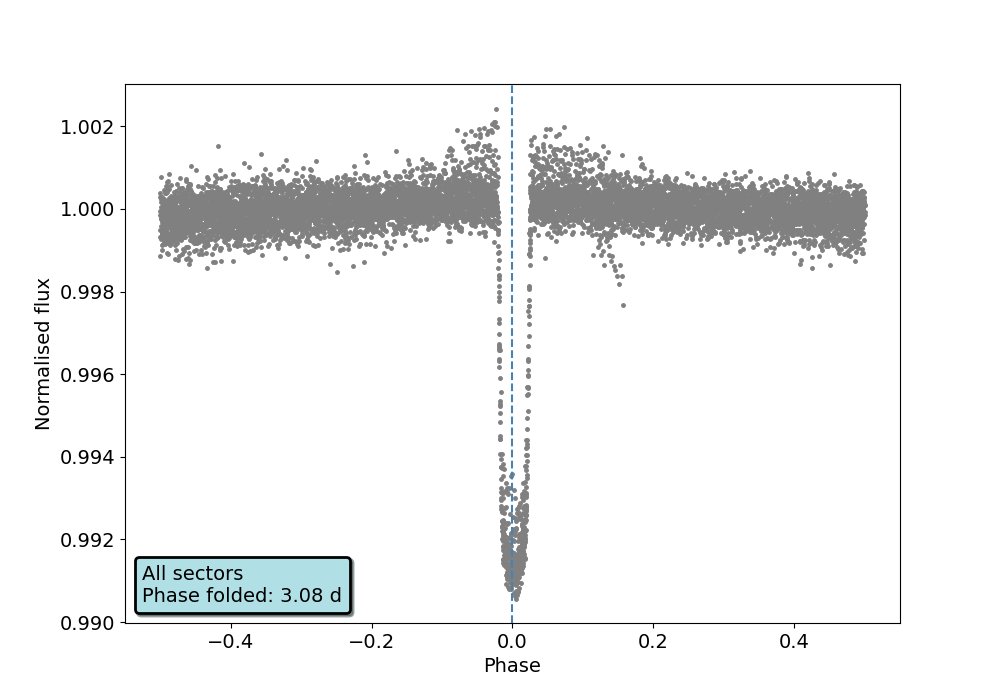

In [29]:
fig = plt.figure()

plt.plot(phase1, norm_flux, marker='.', color='grey', markersize=5.0, linestyle='None',
         label='All sectors\nPhase folded: {} d'.format(period1_2dp))
plt.axvline(0, color=linecolor, linestyle='dashed')
plt.xlabel('Phase')
plt.ylabel('Normalised flux')

leg = plt.legend(handlelength=0, 
                 handletextpad=0, 
                 fancybox=True,
                 shadow=True,
                 loc='lower left')
leg.get_frame().set_linewidth(2.0)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_facecolor(facecolor)
leg.legendHandles[0].set_markersize(0)

plt.savefig("TIC-{}/TIC-{}_all_phase_{}.png".format(tic_id,tic_id,period1_2dp))

<IPython.core.display.Javascript object>


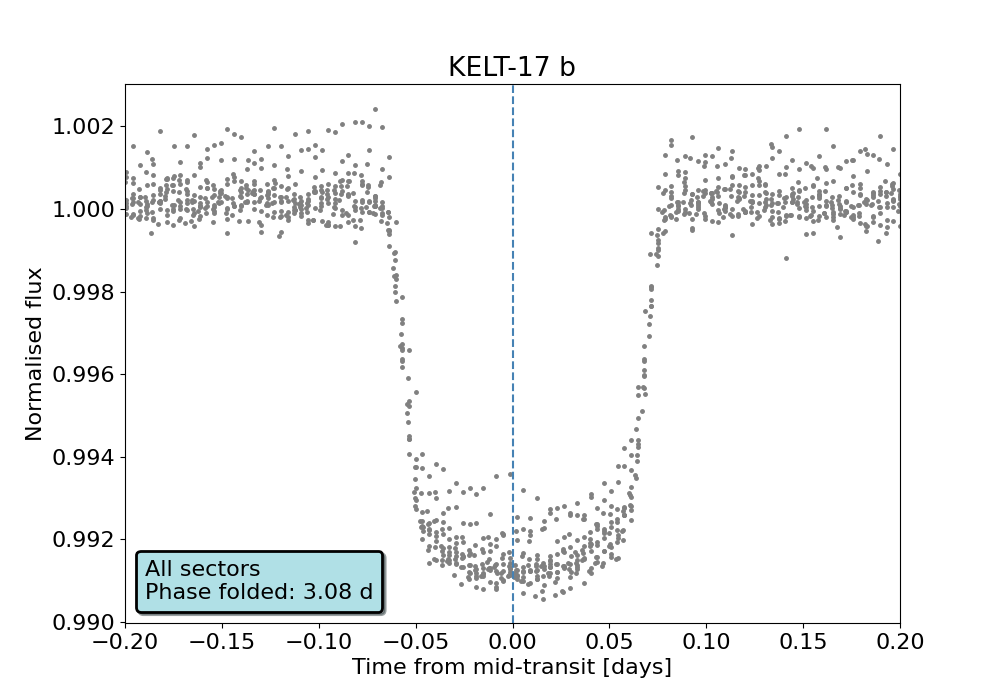

In [34]:
fig = plt.figure()

newphase = phase1*period1*24*0.0416667

plt.plot(newphase, norm_flux, marker='.', color='grey', markersize=5.0, linestyle='None',
         label='All sectors\nPhase folded: {} d'.format(period1_2dp))
plt.axvline(0, color=linecolor, linestyle='dashed')
plt.xlabel('Time from mid-transit [days]')
plt.ylabel('Normalised flux')
plt.title('KELT-17 b')
plt.xlim(-0.2,0.2)

leg = plt.legend(handlelength=0, 
                 handletextpad=0, 
                 fancybox=True,
                 shadow=True,
                 loc='lower left')
leg.get_frame().set_linewidth(2.0)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_facecolor(facecolor)
leg.legendHandles[0].set_markersize(0)

plt.savefig("TIC-{}/TIC-{}_time_cut_{}.png".format(tic_id,tic_id,period1_2dp))

In [ ]:
stdout_obj = sys.stdout
sys.stdout = open("TIC-{}/{}_phasefold.csv" .format(tic_id,tic_id), "w" )
for i in range(0, len(newphase)):
    print(newphase[i], '\t', norm_flux[i], '\t', norm_flux_err[i], '\t', '1')
sys.stdout.close()
sys.stdout = stdout_obj

# Lomb-Scargle Periodogram
#### You generally want to run LS on un-normalised lightcurves to keep some of the periodicity. You can change this as well to run on the original SAP flux if wanted.

In [ ]:
flux_pdc = np.concatenate([flux1,flux2,flux3,flux4,flux5,flux6,flux7,flux8,flux9,flux10,flux11])

flux_err_pdc = np.concatenate([flux_err1,flux_err2,flux_err3,flux_err4,flux_err5,flux_err6,flux_err7,
                               flux_err8,flux_err9,flux_err10,flux_err11])

In [ ]:
indices = np.logical_not(np.logical_or(np.isnan(time), np.isnan(flux_pdc), np.isnan(flux_err_pdc)))
time_ls = time[indices]
flux_ls = flux_pdc[indices]
fluxerr_ls = flux_err_pdc[indices]

#### Calculate the LS parameters and convert frequency into period for easier visualisation of periodic signals.

In [ ]:
frequency, power = LombScargle(time_ls, flux_ls, dy=fluxerr_ls).autopower(
    minimum_frequency=1/30,
    maximum_frequency=1/0.1,
    samples_per_peak=200)
period_estimate = 1/frequency

In [ ]:
best_frequency = frequency[np.argmax(power)]
best_period = period_estimate[np.argmax(power)]
best_period_4dp = np.float("%.4f" % best_period)
print("Best period is:", best_period_4dp, "days")

In [ ]:
fig = plt.figure()

plt.plot(period_estimate, power, color='black')
plt.axvline(best_period, color=linecolor, linestyle='dashed', 
            label='{} d'.format(best_period_4dp))
plt.xlabel("Period [days]")
plt.ylabel("Lomb-Scargle power")

leg = plt.legend(handlelength=0, 
                 handletextpad=0, 
                 fancybox=True,
                 shadow=True,
                 loc='upper left')
leg.get_frame().set_linewidth(2.0)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_facecolor(facecolor)
leg.legendHandles[0].set_markersize(0)

plt.savefig("TIC-{}/TIC-{}_LS_{}d.pdf".format(tic_id,tic_id,best_period_4dp))

#### Phase fold the data on this new best periodic signal estimate.

In [ ]:
phaserot = (((time - (epoch1 + (0.5 * best_period))) % best_period) / best_period) - 0.5

In [ ]:
fig = plt.figure()

plt.plot(phaserot, norm_flux, marker='.', color='grey', markersize=5.0, linestyle='None', 
         label="{} d".format(best_period_4dp))
plt.axvline(0, color=linecolor, linestyle='dashed')
plt.xlabel('Phase')
plt.ylabel('Normalised flux')

leg = plt.legend(handlelength=0, 
                 handletextpad=0, 
                 fancybox=True,
                 shadow=True,
                 loc='upper left')
leg.get_frame().set_linewidth(2.0)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_facecolor(facecolor)
leg.legendHandles[0].set_markersize(0)

plt.savefig("TIC-{}/TIC-{}_phaserot_{}d.pdf".format(tic_id,tic_id,best_period_4dp))

# EXOFAST table creation
#### EXOFAST only takes a maximum of 5000 datapoints.

In [ ]:
pcut = 0.006
bjd = np.array(time) + 2457000.0
flux = np.array(norm_flux)
fluxnanremoved = flux[np.logical_not(np.isnan(flux))]
norm_factor = np.median(fluxnanremoved)
norm_flux = flux/norm_factor
flux_error = np.array(norm_flux_err)
fractional_uncertainty = np.divide(flux_error, flux)
bjd_cut = []
flux_cut = []
err_cut = []
norm_flux_cut = []
for i in range(0, len(time)):
    if -pcut <= phase1[i] <= pcut:
        bjd_cut.append(bjd[i])
        flux_cut.append(flux[i])
        err_cut.append(fractional_uncertainty[i])
        norm_flux_cut.append(norm_flux[i])

if len(flux_cut) < 5000:
    print(len(flux_cut))
else:
    print("Number of points exceeds 5000, please reduce the value of pcut.")

In [ ]:
fig,ax = plt.subplots()

ax.plot(bjd_cut, flux_cut, marker='.', color='grey', markersize=5.0, linestyle='None', 
         label="{} d\nTransits only".format(period1_2dp))
ax.set_ylabel("Normalised flux")
ax.set_xlabel("Time (TBJD)")

leg = plt.legend(handlelength=0, 
                 handletextpad=0, 
                 fancybox=True,
                 shadow=True,
                 loc='upper left')
leg.get_frame().set_linewidth(2.0)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_facecolor(facecolor)
leg.legendHandles[0].set_markersize(0)

plt.show()

In [ ]:
phase2 = (((np.array(bjd_cut) - (epoch1 + (0.5 * period1))) % period1) / period1)

In [ ]:
fig = plt.figure()


newphase2 = phase2*period1*24*0.0416667

plt.plot(newphase2-np.mean(newphase2), flux_cut, marker='.', color='grey', markersize=5.0, linestyle='None',
         label='All sectors\nPhase folded: {} d'.format(period1_2dp))
plt.axvline(0, color=linecolor, linestyle='dashed')
plt.xlabel('Time from mid-transit [days]')
plt.ylabel('Normalised flux')
#plt.xlim(-0.5,0.5)

leg = plt.legend(handlelength=0, 
                 handletextpad=0, 
                 fancybox=True,
                 shadow=True,
                 loc='lower left')
leg.get_frame().set_linewidth(2.0)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_facecolor(facecolor)
leg.legendHandles[0].set_markersize(0)

#plt.savefig("TIC-{}/TIC-{}_time_cut_{}.pdf".format(tic_id,tic_id,period1_2dp))

In [ ]:
stdout_obj = sys.stdout
sys.stdout = open("TIC-{}/{}_phasefold_cut.csv" .format(tic_id,tic_id), "w" )
for i in range(0, len(newphase2)):
    print(newphase2[i], '\t', flux_cut[i], '\t', err_cut[i], '\t', '1')
sys.stdout.close()
sys.stdout = stdout_obj

In [ ]:
stdout_obj = sys.stdout
sys.stdout = open("TIC-{}/{}_EXOFAST_{}d.txt" .format(tic_id,tic_id,period1_2dp), "w" )
print("|             BJD | Normalised_Flux | Normalised_Flux_Uncertainty | Accepted |\n|          double |          double |                      double |      int |\n|            days |                 |                             |          |")
for i in range(0, len(bjd_cut)):
    print(bjd_cut[i], '\t', flux_cut[i], '\t', err_cut[i], '\t', '1')
sys.stdout.close()
sys.stdout = stdout_obj